In [1]:
from collections import defaultdict
import itertools

import pandas as pd

from chord_eval.metric import get_distance
from chord_eval.data_types import ChordType
from chord_eval.constants import TRIAD_REDUCTION

# Making the data
## Create all_distances.csv

In [2]:
root1s = []
root2s = []
chord_type1s = []
chord_type2s = []
inversion1s = []
inversion2s = []
spss = []
mechanicals = {
    1: [],
    2: [],
    3: [],
}
tone_by_tones = {
    0: {
        0: [],
        1: [],
        2: [],
    },
    1: {
        0: [],
        1: [],
        2: [],
    },
    2: {
        0: [],
        1: [],
        2: [],
    },
}

for root1 in range(0, 12):
    print(f"Checking distances from root {root1}")
    for root2 in range(root1, 12):
        for chord_type1 in ChordType:
            for chord_type2 in ChordType:
                for inversion1 in range(3 if chord_type1 in TRIAD_REDUCTION.values() else 4):
                    for inversion2 in range(3 if chord_type2 in TRIAD_REDUCTION.values() else 4):
                        sps = get_distance("SPS", root1, root2, chord_type1, chord_type2, inversion1=inversion1, inversion2=inversion2)

                        for bass_weight in [1, 2, 3]:
                            mechanicals[bass_weight].append(
                                get_distance(
                                    "mechanical",
                                    root1,
                                    root2,
                                    chord_type1,
                                    chord_type2,
                                    inversion1=inversion1,
                                    inversion2=inversion2,
                                    bass_weight=bass_weight,
                                )
                            )

                        for root_bonus in [0, 1, 2]:
                            for bass_bonus in [0, 1, 2]:
                                tone_by_tones[root_bonus][bass_bonus].append(
                                    get_distance(
                                        "tone by tone",
                                        root1,
                                        root2,
                                        chord_type1,
                                        chord_type2,
                                        inversion1=inversion1,
                                        inversion2=inversion2,
                                        bass_bonus=bass_bonus,
                                        root_bonus=root_bonus,
                                    )
                                )

                        root1s.append(root1)
                        root2s.append(root2)
                        chord_type1s.append(chord_type1)
                        chord_type2s.append(chord_type2)
                        inversion1s.append(inversion1)
                        inversion2s.append(inversion2)
                        spss.append(sps)

Checking distances from root 0
Checking distances from root 1
Checking distances from root 2
Checking distances from root 3
Checking distances from root 4
Checking distances from root 5
Checking distances from root 6
Checking distances from root 7
Checking distances from root 8
Checking distances from root 9
Checking distances from root 10
Checking distances from root 11


In [9]:
data_dict = {
    "root1": root1s,
    "root2": root2s,
    "chord_type1": chord_type1s,
    "chord_type2": chord_type2s,
    "inversion1": inversion1s,
    "inversion2": inversion2s,
    "sps": spss,
}

for bass_weight in [1, 2, 3]:
    data_dict[f"mechanical_b{bass_weight}"] = mechanicals[bass_weight]

for root_bonus in [0, 1, 2]:
    for bass_bonus in [0, 1, 2]:
        data_dict[f"tone_by_tone_r{root_bonus}_b{bass_bonus}"] = tone_by_tones[root_bonus][bass_bonus]

data = pd.DataFrame(data_dict)
data.to_csv("all_distances.csv", index=False)

## Load all_distances.csv

In [11]:
data = pd.read_csv("all_distances.csv")

for chord_type in ChordType:
    for i in ["1", "2"]:
        data.loc[data[f"chord_type{i}"] == str(chord_type), [f"chord_type{i}"]] = chord_type

In [12]:
data

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,mechanical_b1,mechanical_b2,mechanical_b3,tone_by_tone_r0_b0,tone_by_tone_r0_b1,tone_by_tone_r0_b2,tone_by_tone_r1_b0,tone_by_tone_r1_b1,tone_by_tone_r1_b2,tone_by_tone_r2_b0,tone_by_tone_r2_b1,tone_by_tone_r2_b2
0,0,0,ChordType.MAJOR,ChordType.MAJOR,0,0,0.000000,0,0,0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0,0,ChordType.MAJOR,ChordType.MAJOR,0,1,0.180520,4,8,12,0.0,0.25,0.400000,0.0,0.200000,0.333333,0.0,0.166667,0.285714
2,0,0,ChordType.MAJOR,ChordType.MAJOR,0,2,0.040469,5,10,15,0.0,0.25,0.400000,0.0,0.200000,0.333333,0.0,0.166667,0.285714
3,0,0,ChordType.MAJOR,ChordType.MAJOR,1,0,0.180520,4,8,12,0.0,0.25,0.400000,0.0,0.200000,0.333333,0.0,0.166667,0.285714
4,0,0,ChordType.MAJOR,ChordType.MAJOR,1,1,0.000000,0,0,0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151003,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,2,3,0.024775,3,6,9,0.0,0.20,0.333333,0.0,0.166667,0.285714,0.0,0.142857,0.250000
151004,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,0,0.088996,1,2,3,0.0,0.20,0.333333,0.0,0.166667,0.285714,0.0,0.142857,0.250000
151005,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,1,0.103985,5,10,15,0.0,0.20,0.333333,0.0,0.166667,0.285714,0.0,0.142857,0.250000
151006,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,2,0.024775,3,6,9,0.0,0.20,0.333333,0.0,0.166667,0.285714,0.0,0.142857,0.250000


# Plotting

Text(0.5, 1.0, 'tone_by_tone_r1_b1')

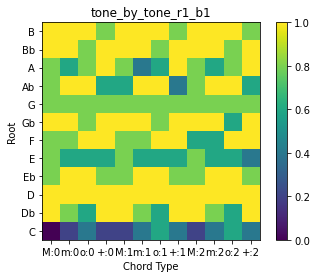

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

triads = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED]
maj_min = [ChordType.MAJOR, ChordType.MINOR]

c_maj_mask = (data["root1"] == 0) & (data["chord_type1"] == ChordType.MAJOR) & (data["inversion1"] == 0)
c_maj_data = data.loc[c_maj_mask]

metric = "tone_by_tone_r1_b1"

matrix = np.zeros((12, 4 * 3))

for root in range(12):
    for i, (inv, chord_type) in enumerate(itertools.product(range(3), triads)):
        matrix[(11 - root), i] = c_maj_data.loc[(c_maj_data["root2"] == root) & (c_maj_data["chord_type2"] == chord_type) & (c_maj_data["inversion2"] == inv), metric]


plt.imshow(matrix)
plt.colorbar()
plt.xlabel("Chord Type")
plt.ylabel("Root")
plt.xticks(ticks=range(12), labels=[f"{chord_type}:{inv}" for inv, chord_type in itertools.product(range(3), ["M", "m", "o", "+"])])
plt.yticks(ticks=range(12), labels=["B", "Bb", "A", "Ab", "G", "Gb", "F", "E", "Eb", "D", "Db", "C"])
plt.title(metric)

Text(0.5, 1.0, 'sps')

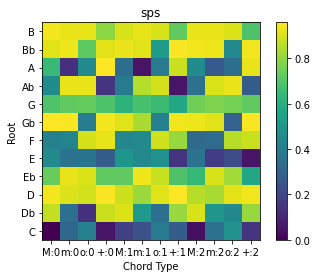

In [14]:
import matplotlib.pyplot as plt
import numpy as np

triads = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED]
maj_min = [ChordType.MAJOR, ChordType.MINOR]

c_maj_mask = (data["root1"] == 0) & (data["chord_type1"] == ChordType.MAJOR) & (data["inversion1"] == 0)
c_maj_data = data.loc[c_maj_mask]

metric = "sps"

matrix = np.zeros((12, 4 * 3))

for root in range(12):
    for i, (inv, chord_type) in enumerate(itertools.product(range(3), triads)):
        matrix[(11 - root), i] = c_maj_data.loc[(c_maj_data["root2"] == root) & (c_maj_data["chord_type2"] == chord_type) & (c_maj_data["inversion2"] == inv), metric]


plt.imshow(matrix)
plt.colorbar()
plt.xlabel("Chord Type")
plt.ylabel("Root")
plt.xticks(ticks=range(12), labels=[f"{chord_type}:{inv}" for inv, chord_type in itertools.product(range(3), ["M", "m", "o", "+"])])
plt.yticks(ticks=range(12), labels=["B", "Bb", "A", "Ab", "G", "Gb", "F", "E", "Eb", "D", "Db", "C"])
plt.title(metric)

Text(0.5, 1.0, 'mechanical_b2')

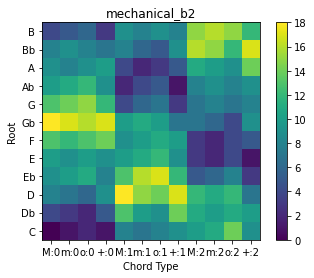

In [15]:
import matplotlib.pyplot as plt
import numpy as np

triads = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED]
maj_min = [ChordType.MAJOR, ChordType.MINOR]

c_maj_mask = (data["root1"] == 0) & (data["chord_type1"] == ChordType.MAJOR) & (data["inversion1"] == 0)
c_maj_data = data.loc[c_maj_mask]

metric = "mechanical_b2"

matrix = np.zeros((12, 4 * 3))

for root in range(12):
    for i, (inv, chord_type) in enumerate(itertools.product(range(3), triads)):
        matrix[(11 - root), i] = c_maj_data.loc[(c_maj_data["root2"] == root) & (c_maj_data["chord_type2"] == chord_type) & (c_maj_data["inversion2"] == inv), metric]


plt.imshow(matrix)
plt.colorbar()
plt.xlabel("Chord Type")
plt.ylabel("Root")
plt.xticks(ticks=range(12), labels=[f"{chord_type}:{inv}" for inv, chord_type in itertools.product(range(3), ["M", "m", "o", "+"])])
plt.yticks(ticks=range(12), labels=["B", "Bb", "A", "Ab", "G", "Gb", "F", "E", "Eb", "D", "Db", "C"])
plt.title(metric)

# Metric Normalization

In [16]:
metric_names = ["sps"]

for bass_weight in [1, 2, 3]:
    metric_names.append(f"mechanical_b{bass_weight}")

for root_bonus in [0, 1, 2]:
    for bass_bonus in [0, 1, 2]:
        metric_names.append(f"tone_by_tone_r{root_bonus}_b{bass_bonus}")

means = {metric: data[metric].mean() for metric in metric_names}
stds = {metric: data[metric].std() for metric in metric_names}

for metric in metric_names:
    data[f"{metric}_norm"] = (data[metric] - means[metric]) / stds[metric]

In [17]:
common_chord_types = [
    ChordType.MAJOR,
    ChordType.MINOR,
    ChordType.MAJ_MIN7,
    ChordType.DIMINISHED,
    ChordType.DIM7,
    ChordType.MIN_MIN7,
]

small_data = data.loc[data["chord_type1"].isin(common_chord_types) & data["chord_type2"].isin(common_chord_types)]

In [18]:
means

{'sps': 0.5721972574238494,
 'mechanical_b1': 6.374807957194321,
 'mechanical_b2': 9.367497086247086,
 'mechanical_b3': 12.360186215299851,
 'tone_by_tone_r0_b0': 0.6698188175460339,
 'tone_by_tone_r0_b1': 0.7214558169106697,
 'tone_by_tone_r0_b2': 0.7547679593130326,
 'tone_by_tone_r1_b0': 0.707553242212655,
 'tone_by_tone_r1_b1': 0.7433275058271421,
 'tone_by_tone_r1_b2': 0.7683623194986704,
 'tone_by_tone_r2_b0': 0.7318870523411859,
 'tone_by_tone_r2_b1': 0.7586390881844431,
 'tone_by_tone_r2_b2': 0.7784232812639786}

In [19]:
stds

{'sps': 0.24544982937625243,
 'mechanical_b1': 2.527987065888612,
 'mechanical_b2': 4.092866907810206,
 'mechanical_b3': 5.786831190688099,
 'tone_by_tone_r0_b0': 0.2569781599504201,
 'tone_by_tone_r0_b1': 0.22460163456958446,
 'tone_by_tone_r0_b2': 0.21402574199184762,
 'tone_by_tone_r1_b0': 0.24248019234216658,
 'tone_by_tone_r1_b1': 0.21696156802459182,
 'tone_by_tone_r1_b2': 0.2069520063579233,
 'tone_by_tone_r2_b0': 0.2452949246875706,
 'tone_by_tone_r2_b1': 0.2216262657170972,
 'tone_by_tone_r2_b2': 0.21010620242901681}

In [20]:
data

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,mechanical_b1,mechanical_b2,mechanical_b3,...,mechanical_b3_norm,tone_by_tone_r0_b0_norm,tone_by_tone_r0_b1_norm,tone_by_tone_r0_b2_norm,tone_by_tone_r1_b0_norm,tone_by_tone_r1_b1_norm,tone_by_tone_r1_b2_norm,tone_by_tone_r2_b0_norm,tone_by_tone_r2_b1_norm,tone_by_tone_r2_b2_norm
0,0,0,ChordType.MAJOR,ChordType.MAJOR,0,0,0.000000,0,0,0,...,-2.135916,-2.60652,-3.212157,-3.526529,-2.917984,-3.426079,-3.712756,-2.983702,-3.423056,-3.704904
1,0,0,ChordType.MAJOR,ChordType.MAJOR,0,1,0.180520,4,8,12,...,-0.062242,-2.60652,-2.099076,-1.657595,-2.917984,-2.504257,-2.102077,-2.983702,-2.671039,-2.345047
2,0,0,ChordType.MAJOR,ChordType.MAJOR,0,2,0.040469,5,10,15,...,0.456176,-2.60652,-2.099076,-1.657595,-2.917984,-2.504257,-2.102077,-2.983702,-2.671039,-2.345047
3,0,0,ChordType.MAJOR,ChordType.MAJOR,1,0,0.180520,4,8,12,...,-0.062242,-2.60652,-2.099076,-1.657595,-2.917984,-2.504257,-2.102077,-2.983702,-2.671039,-2.345047
4,0,0,ChordType.MAJOR,ChordType.MAJOR,1,1,0.000000,0,0,0,...,-2.135916,-2.60652,-3.212157,-3.526529,-2.917984,-3.426079,-3.712756,-2.983702,-3.423056,-3.704904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151003,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,2,3,0.024775,3,6,9,...,-0.580661,-2.60652,-2.321692,-1.969084,-2.917984,-2.657894,-2.332174,-2.983702,-2.778470,-2.515029
151004,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,0,0.088996,1,2,3,...,-1.617498,-2.60652,-2.321692,-1.969084,-2.917984,-2.657894,-2.332174,-2.983702,-2.778470,-2.515029
151005,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,1,0.103985,5,10,15,...,0.456176,-2.60652,-2.321692,-1.969084,-2.917984,-2.657894,-2.332174,-2.983702,-2.778470,-2.515029
151006,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,2,0.024775,3,6,9,...,-0.580661,-2.60652,-2.321692,-1.969084,-2.917984,-2.657894,-2.332174,-2.983702,-2.778470,-2.515029


In [21]:
sorted = defaultdict(dict)
sorted_small = defaultdict(dict)

for metric1, metric2 in itertools.product(metric_names, metric_names):
    sorted_small[metric1][metric2] = (
        small_data[f"{metric1}_norm"] - small_data[f"{metric2}_norm"]
    ).abs().sort_values(ascending=False)

    sorted[metric1][metric2] = (
        data[f"{metric1}_norm"] - data[f"{metric2}_norm"]
    ).abs().sort_values(ascending=False)

# SPS and Tone by Tone

In [22]:
small_data.loc[
    sorted_small["sps"]["tone_by_tone_r0_b0"].index
].loc[
    (data["root1"] == 0) & (data["sps_norm"] > data["tone_by_tone_r0_b0_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r0_b0", "tone_by_tone_r0_b0_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r0_b0,tone_by_tone_r0_b0_norm,mechanical_b1,mechanical_b1_norm
22603,0,11,ChordType.DIM7,ChordType.MAJ_MIN7,2,3,0.488563,-0.340740,0.250000,-1.633675,4,-0.939407
22636,0,11,ChordType.DIM7,ChordType.MIN_MIN7,3,0,0.721522,0.608373,0.500000,-0.660830,4,-0.939407
19447,0,10,ChordType.MAJOR,ChordType.DIM7,0,3,0.638893,0.271730,0.416667,-0.985112,8,0.642880
13636,0,7,ChordType.MAJOR,ChordType.DIM7,0,0,0.638893,0.271730,0.416667,-0.985112,8,0.642880
22606,0,11,ChordType.DIM7,ChordType.MAJ_MIN7,3,2,0.478767,-0.380649,0.250000,-1.633675,4,-0.939407
19452,0,10,ChordType.MAJOR,ChordType.DIM7,2,0,0.629767,0.234549,0.416667,-0.985112,4,-0.939407
5941,0,3,ChordType.MINOR,ChordType.MAJOR,0,1,0.539440,-0.133458,0.333333,-1.309393,7,0.247308
22594,0,11,ChordType.DIM7,ChordType.MAJ_MIN7,0,2,0.454723,-0.478607,0.250000,-1.633675,7,0.247308
22624,0,11,ChordType.DIM7,ChordType.MIN_MIN7,0,0,0.692637,0.490689,0.500000,-0.660830,2,-1.730550
5948,0,3,ChordType.MINOR,ChordType.MAJOR,2,2,0.532994,-0.159720,0.333333,-1.309393,5,-0.543835


In [23]:
small_data.loc[
    sorted_small["sps"]["tone_by_tone_r0_b0"].index
].loc[
    (data["root1"] == 0) & (data["sps_norm"] < data["tone_by_tone_r0_b0_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r0_b0", "tone_by_tone_r0_b0_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r0_b0,tone_by_tone_r0_b0_norm,mechanical_b1,mechanical_b1_norm
2709,0,1,ChordType.MAJ_MIN7,ChordType.MAJ_MIN7,1,1,0.548891,-0.094953,1.000000,1.284861,4,-0.939407
4693,0,2,ChordType.MAJ_MIN7,ChordType.DIM7,1,1,0.549349,-0.093089,1.000000,1.284861,5,-0.543835
1989,0,1,ChordType.MAJOR,ChordType.MAJ_MIN7,1,1,0.549997,-0.090449,1.000000,1.284861,4,-0.939407
3961,0,2,ChordType.MAJOR,ChordType.DIM7,1,1,0.550742,-0.087411,1.000000,1.284861,5,-0.543835
2741,0,1,ChordType.MAJ_MIN7,ChordType.MIN_MIN7,1,1,0.312039,-1.059924,0.750000,0.312016,3,-1.334978
2222,0,1,ChordType.DIMINISHED,ChordType.DIMINISHED,1,1,0.551086,-0.086011,1.000000,1.284861,3,-1.334978
3285,0,1,ChordType.DIM7,ChordType.DIM7,1,1,0.551379,-0.084817,1.000000,1.284861,4,-0.939407
2289,0,1,ChordType.DIMINISHED,ChordType.DIM7,1,1,0.554860,-0.070636,1.000000,1.284861,5,-0.543835
1940,0,1,ChordType.MAJOR,ChordType.MAJOR,1,1,0.568540,-0.014899,1.000000,1.284861,3,-1.334978
3894,0,2,ChordType.MAJOR,ChordType.DIMINISHED,1,1,0.569744,-0.009996,1.000000,1.284861,4,-0.939407


# SPS and Mechanical

In [24]:
small_data.loc[
    sorted_small["sps"]["mechanical_b1"].index
].loc[
    (data["root1"] == 0) & (data["sps_norm"] > data["mechanical_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r0_b0", "tone_by_tone_r0_b0_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r0_b0,tone_by_tone_r0_b0_norm,mechanical_b1,mechanical_b1_norm
21437,0,11,ChordType.MINOR,ChordType.MINOR,0,0,0.955547,1.561826,1.000000,1.284861,3,-1.334978
21578,0,11,ChordType.DIMINISHED,ChordType.DIMINISHED,0,0,0.941346,1.503968,1.000000,1.284861,3,-1.334978
21296,0,11,ChordType.MAJOR,ChordType.MAJOR,0,0,0.940558,1.500757,1.000000,1.284861,3,-1.334978
15503,0,8,ChordType.MAJOR,ChordType.MINOR,2,0,0.931684,1.464604,1.000000,1.284861,3,-1.334978
21304,0,11,ChordType.MAJOR,ChordType.MAJOR,2,2,0.930674,1.460488,1.000000,1.284861,3,-1.334978
21586,0,11,ChordType.DIMINISHED,ChordType.DIMINISHED,2,2,0.928591,1.452002,1.000000,1.284861,3,-1.334978
7879,0,4,ChordType.MINOR,ChordType.MAJOR,1,0,0.928500,1.451633,1.000000,1.284861,3,-1.334978
13821,0,7,ChordType.DIMINISHED,ChordType.MAJOR,1,2,0.920400,1.418633,1.000000,1.284861,3,-1.334978
13822,0,7,ChordType.DIMINISHED,ChordType.MAJOR,2,0,0.918750,1.411907,1.000000,1.284861,3,-1.334978
8020,0,4,ChordType.DIMINISHED,ChordType.MINOR,1,0,0.916251,1.401726,1.000000,1.284861,3,-1.334978


In [25]:
small_data.loc[
    sorted_small["sps"]["mechanical_b1"].index
].loc[
    (data["root1"] == 0) & (data["sps_norm"] < data["mechanical_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r0_b0", "tone_by_tone_r0_b0_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r0_b0,tone_by_tone_r0_b0_norm,mechanical_b1,mechanical_b1_norm
11902,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,1,1,0.172817,-1.627136,0.333333,-1.309393,12,2.225166
11898,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,0,0,0.303394,-1.095147,0.333333,-1.309393,12,2.225166
11906,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,2,2,0.330539,-0.984552,0.333333,-1.309393,12,2.225166
11901,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,1,0,0.088465,-1.970799,0.333333,-1.309393,9,1.038452
7069,0,3,ChordType.DIM7,ChordType.DIMINISHED,1,2,0.091673,-1.957728,0.125000,-2.120098,9,1.038452
11964,0,6,ChordType.DIMINISHED,ChordType.DIM7,0,0,0.097012,-1.935978,0.125000,-2.120098,9,1.038452
17775,0,9,ChordType.DIMINISHED,ChordType.DIM7,0,3,0.097012,-1.935978,0.125000,-2.120098,9,1.038452
350,0,0,ChordType.DIMINISHED,ChordType.DIM7,0,2,0.097012,-1.935978,0.125000,-2.120098,9,1.038452
1262,0,0,ChordType.DIM7,ChordType.DIMINISHED,2,0,0.097012,-1.935978,0.125000,-2.120098,9,1.038452
6157,0,3,ChordType.DIMINISHED,ChordType.DIM7,0,1,0.097012,-1.935978,0.125000,-2.120098,9,1.038452


# Tone by Tone vs Mechanical

In [26]:
small_data.loc[
    sorted_small["tone_by_tone_r0_b0"]["mechanical_b1"].index
].loc[
    (data["root1"] == 0) & (data["tone_by_tone_r0_b0_norm"] > data["mechanical_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r0_b0", "tone_by_tone_r0_b0_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r0_b0,tone_by_tone_r0_b0_norm,mechanical_b1,mechanical_b1_norm
1936,0,1,ChordType.MAJOR,ChordType.MAJOR,0,0,0.870328,1.214629,1.0,1.284861,3,-1.334978
15498,0,8,ChordType.MAJOR,ChordType.MINOR,0,1,0.853446,1.145849,1.0,1.284861,3,-1.334978
15644,0,8,ChordType.MINOR,ChordType.DIMINISHED,2,0,0.875754,1.236737,1.0,1.284861,3,-1.334978
15643,0,8,ChordType.MINOR,ChordType.DIMINISHED,1,2,0.910375,1.377788,1.0,1.284861,3,-1.334978
1944,0,1,ChordType.MAJOR,ChordType.MAJOR,2,2,0.713489,0.575644,1.0,1.284861,3,-1.334978
15639,0,8,ChordType.MINOR,ChordType.DIMINISHED,0,1,0.855473,1.154107,1.0,1.284861,3,-1.334978
1940,0,1,ChordType.MAJOR,ChordType.MAJOR,1,1,0.568540,-0.014899,1.0,1.284861,3,-1.334978
15503,0,8,ChordType.MAJOR,ChordType.MINOR,2,0,0.931684,1.464604,1.0,1.284861,3,-1.334978
15502,0,8,ChordType.MAJOR,ChordType.MINOR,1,2,0.809340,0.966154,1.0,1.284861,3,-1.334978
9700,0,5,ChordType.MAJOR,ChordType.DIMINISHED,0,2,0.854924,1.151873,1.0,1.284861,3,-1.334978


In [27]:
small_data.loc[
    sorted_small["tone_by_tone_r0_b0"]["mechanical_b1"].index
].loc[
    (data["root1"] == 0) & (data["tone_by_tone_r0_b0_norm"] < data["mechanical_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r0_b0", "tone_by_tone_r0_b0_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r0_b0,tone_by_tone_r0_b0_norm,mechanical_b1,mechanical_b1_norm
11902,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,1,1,0.172817,-1.627136,0.333333,-1.309393,12,2.225166
11906,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,2,2,0.330539,-0.984552,0.333333,-1.309393,12,2.225166
11898,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,0,0,0.303394,-1.095147,0.333333,-1.309393,12,2.225166
350,0,0,ChordType.DIMINISHED,ChordType.DIM7,0,2,0.097012,-1.935978,0.125000,-2.120098,9,1.038452
356,0,0,ChordType.DIMINISHED,ChordType.DIM7,2,0,0.115450,-1.860856,0.125000,-2.120098,9,1.038452
17781,0,9,ChordType.DIMINISHED,ChordType.DIM7,2,1,0.115450,-1.860856,0.125000,-2.120098,9,1.038452
17775,0,9,ChordType.DIMINISHED,ChordType.DIM7,0,3,0.097012,-1.935978,0.125000,-2.120098,9,1.038452
12872,0,6,ChordType.DIM7,ChordType.DIMINISHED,0,0,0.257014,-1.284104,0.125000,-2.120098,9,1.038452
1262,0,0,ChordType.DIM7,ChordType.DIMINISHED,2,0,0.097012,-1.935978,0.125000,-2.120098,9,1.038452
7069,0,3,ChordType.DIM7,ChordType.DIMINISHED,1,2,0.091673,-1.957728,0.125000,-2.120098,9,1.038452


In [69]:
data.loc[
    (data["root1"] == 0) &
    (data["root2"] == 4) &
    (data["chord_type1"] == ChordType.MINOR) &
    (data["chord_type2"] == ChordType.MAJOR) &
    (data["inversion1"] == 1) &
    (data["inversion2"] == 0)
]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,voice_leading_b1,voice_leading_b2,voice_leading_b3,tone_by_tone_r1_b1,tone_by_tone_r1_b2,tone_by_tone_r1_b3,tone_by_tone_r2_b1,tone_by_tone_r2_b2,tone_by_tone_r2_b3,tone_by_tone_r3_b1,tone_by_tone_r3_b2,tone_by_tone_r3_b3,sps_norm,voice_leading_b1_norm,voice_leading_b2_norm,voice_leading_b3_norm,tone_by_tone_r1_b1_norm,tone_by_tone_r1_b2_norm,tone_by_tone_r1_b3_norm,tone_by_tone_r2_b1_norm,tone_by_tone_r2_b2_norm,tone_by_tone_r2_b3_norm,tone_by_tone_r3_b1_norm,tone_by_tone_r3_b2_norm,tone_by_tone_r3_b3_norm,sps_norm_norm,voice_leading_b1_norm_norm,voice_leading_b2_norm_norm,voice_leading_b3_norm_norm,tone_by_tone_r1_b1_norm_norm,tone_by_tone_r1_b2_norm_norm,tone_by_tone_r1_b3_norm_norm,tone_by_tone_r2_b1_norm_norm,tone_by_tone_r2_b2_norm_norm,tone_by_tone_r2_b3_norm_norm,tone_by_tone_r3_b1_norm_norm,tone_by_tone_r3_b2_norm_norm,tone_by_tone_r3_b3_norm_norm
7879,0,4,ChordType.MINOR,ChordType.MAJOR,1,0,0.9285,3.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.451633,-1.391812,-1.343826,-1.294114,1.276999,1.235499,1.143826,1.201642,1.180121,1.117826,1.091156,1.08769,1.053847,-0.879585,-3.970022,-3.662832,-3.450419,-1.531879,-2.155,-2.538631,-1.883149,-2.398104,-2.731788,-2.030287,-2.463998,-2.769499
